In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [3]:
data= pd.read_csv("HR_comma_sep.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
X=data.drop("left", axis=1)
y=data["left"]

In [9]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

In [10]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [11]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [12]:
X_transformed = pipeline.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

## Logistic Regresssion Testing

In [14]:
lr_model =LogisticRegression()

In [15]:
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr):.2f}")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression
Accuracy: 0.79
Precision: 0.59
Recall: 0.34
F1 Score: 0.43
[[3172  256]
 [ 705  367]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3428
           1       0.59      0.34      0.43      1072

    accuracy                           0.79      4500
   macro avg       0.70      0.63      0.65      4500
weighted avg       0.76      0.79      0.76      4500



## Random Forest Classifier

In [16]:
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.2f}")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier
Accuracy: 0.98
Precision: 0.99
Recall: 0.95
F1 Score: 0.97
[[3415   13]
 [  55 1017]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3428
           1       0.99      0.95      0.97      1072

    accuracy                           0.98      4500
   macro avg       0.99      0.97      0.98      4500
weighted avg       0.98      0.98      0.98      4500



In [18]:
# Get the feature importances
feature_importances = rf_model.feature_importances_

numerical_feature_names = numerical_cols.tolist()
categorical_feature_names = list(preprocessor.transformers_[1][1].get_feature_names_out(categorical_cols))

# Combine them into a single list
feature_names = numerical_feature_names + categorical_feature_names


In [19]:
feature_names

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'Department_RandD',
 'Department_accounting',
 'Department_hr',
 'Department_management',
 'Department_marketing',
 'Department_product_mng',
 'Department_sales',
 'Department_support',
 'Department_technical',
 'salary_low',
 'salary_medium']

In [20]:
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})


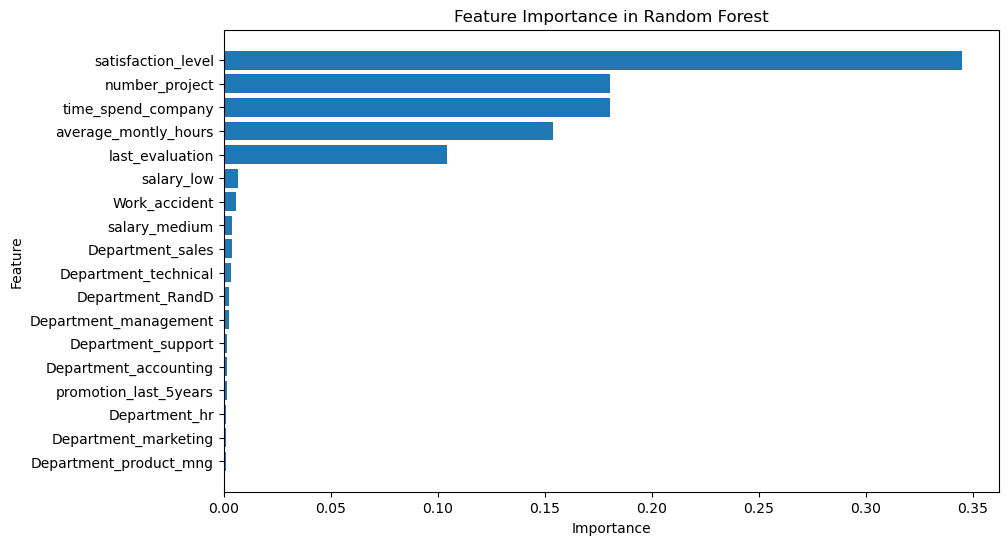

In [21]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

Therefore the HR in order to retain employees must do the following
1. monitor the employee satisfaction level, this can be variable from person to person therefore it would require qualitative analysis by the HR departments
2. Place employes in more number of projects
3. concentrate more on the recent hiring, as people that have spent more years in the organization are less likely to leave
4. initiate strategies where time spent in company increase this also would increase average monthly hours
5. evaluate the employee more carefully as it also contributes to their retention, or give such employees extra attention